**Prática de Suavização de Imagens**

(filtro passa baixa)

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/mean.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

http://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm

1)	Aplique o filtro de Média a imagem abaixo para diferentes tamanhos de máscaras.
- 3x3; 7x7; 3x3 aplicado três vezes sequenciais.

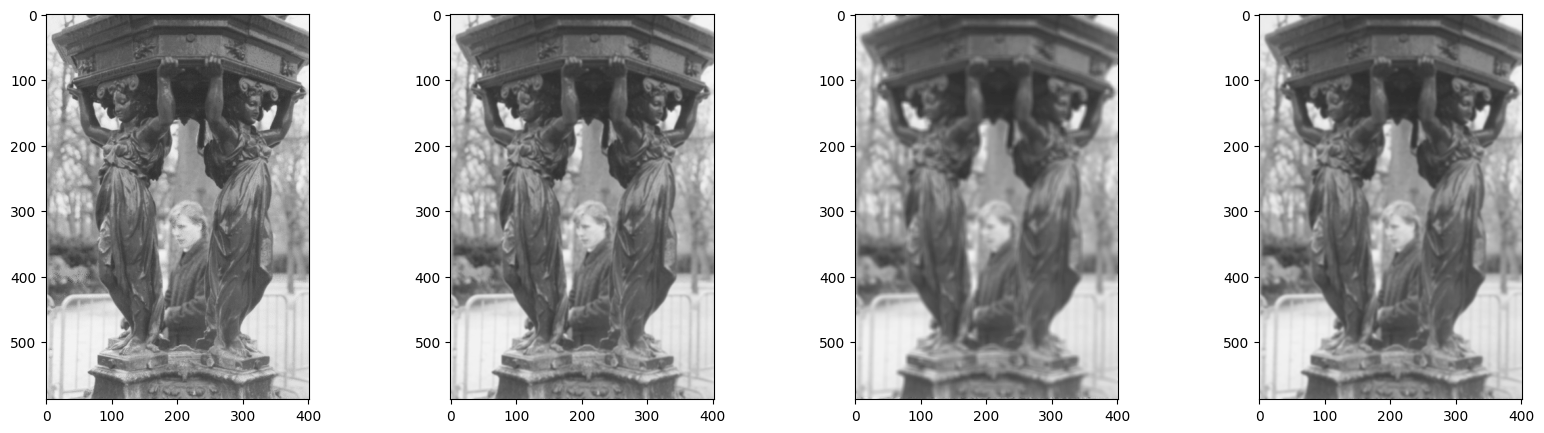

In [73]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

def mask_filter(dimension:int, img):
    anchor = int(np.ceil(dimension/2))
    new_img = img.copy() 
    dxy = int(dimension - anchor) # mediana do valor (mcc pura)
    rows = len(img)
    cols = len(img[0])
    for i in range(dxy,rows-dxy):
        for j in range(dxy,cols-dxy):
            neighbors = img[i-dxy:i+dxy+1, j-dxy:j+dxy+1]
            new_img[i,j] = neighbors.mean()
    return new_img

img1 = cv2.imread("sta2.png", cv2.IMREAD_GRAYSCALE)
img2 = mask_filter(3,img1)
img3 = mask_filter(7,img1)
img4 = mask_filter(3,mask_filter(3,img2))

plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,4,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,4,3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,4,4)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255)
plt.show()

2)	Aplique o filtro Gaussiano à imagem abaixo para diferentes valores de desvio padrão (σ) e tamanho de máscara.
- σ = 1.0 (kernel size 5×5).	σ = 2.0 (kernel size 9×9).	σ =  4.0 (kernel size 15×15).

[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1 217 ... 255   1   1]
 ...
 [  1   1 174 ... 154   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]]
[[217 214 209 ... 251 255 255]
 [226 224 224 ... 255 255 255]
 [215 217 219 ... 255 255 255]
 ...
 [177 166 164 ... 154 148 143]
 [179 170 172 ... 148 154 154]
 [174 170 176 ... 143 148 154]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[217 214 209 ... 251 255 255]
 [226 224 224 ... 255 255 255]
 [215 217 219 ... 255 255 255]
 ...
 [177 166 164 ... 154 148 143]
 [179 170 172 ... 148 154 154]
 [174 170 176 ... 143 148 154]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[217 214 209 ... 251 255 255]
 [226 224 224 ... 255 255 255]
 [215 217 219 ... 255 255 255]
 ...
 [177 166 164 ... 154 148 143]
 [179 170 172 ... 148 154 154]
 [174 170 176 ... 143 14

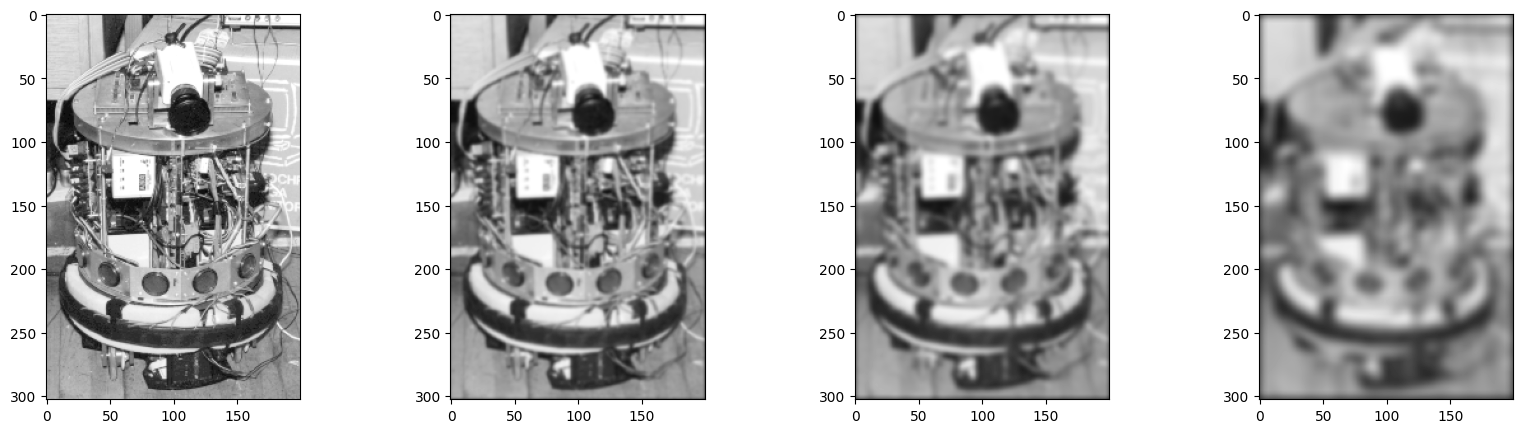

In [32]:
#  code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

def gauss(x,y,sigma):
    fator = 1/(2*np.pi*pow(sigma,2))
    return fator*np.exp(-(x**2 + y**2)/(2*sigma**2))

def gauss_mask(sigma, size=5):
    mask = np.zeros((size, size))
    center = size // 2    
    for x in range(size):
        for y in range(size):
            x_dist = x - center
            y_dist = y - center
            mask[x, y] = gauss(x_dist, y_dist, sigma)
    return mask / np.sum(mask)


def apply_gaussian(img, sigma, size=5):
    mask = gauss_mask(sigma, size)
    anchor = size // 2
    row, col = img.shape
    new_img = np.zeros((row, col))
    pad_image = np.pad(img, (anchor, anchor), mode='constant', constant_values=1)
    for i in range(row):
        for j in range(col):
            neighbors = pad_image[i:i+size, j:j+size]
            new_img[i,j] = np.sum(neighbors * mask)
    return new_img


img2 = cv2.imread("ben2.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20, 5))
plt.subplot(1,4,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,4,2)
plt.imshow(apply_gaussian(img2, 1.0, 5), cmap='gray', vmin=0, vmax=255);
plt.subplot(1,4,3)
plt.imshow(apply_gaussian(img2, 2.0, 9), cmap='gray', vmin=0, vmax=255);
plt.subplot(1,4,4)
plt.imshow(apply_gaussian(img2, 4.0, 15), cmap='gray', vmin=0, vmax=255);
plt.show()

3)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído *salt and pepper*
-	3×3 filter;	7×7 filter

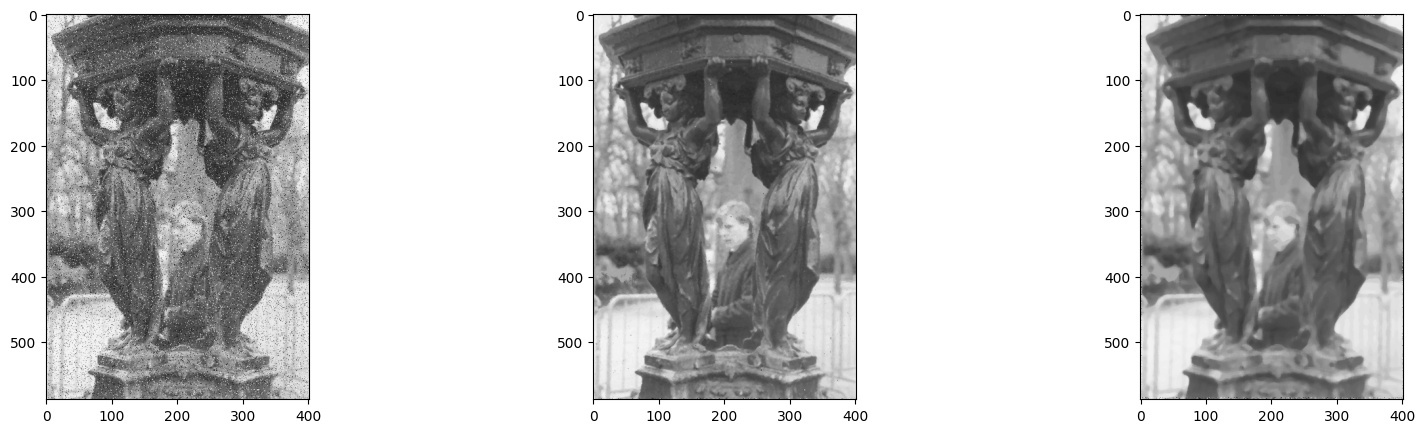

In [80]:
#  code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

def mask_filter(dimension:int, img):
    anchor = int(np.ceil(dimension/2))
    new_img = img.copy() 
    dxy = int(dimension - anchor) # mediana do valor (mcc pura)
    rows = len(img)
    cols = len(img[0])
    for i in range(dxy,rows-dxy):
        for j in range(dxy,cols-dxy):
            neighbors = img[i-dxy:i+dxy+1, j-dxy:j+dxy+1]
            new_img[i,j] = np.median(neighbors)
    return new_img

img3 = cv2.imread("sta2noi2.png", cv2.IMREAD_GRAYSCALE)
img_filtered3 = mask_filter(3,img3)
img_filtered7 = mask_filter(7,img3)

plt.figure(figsize=(20, 5))    
plt.subplot(1,3,1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,3,2)
plt.imshow(img_filtered3, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,3,3)
plt.imshow(img_filtered7, cmap='gray', vmin=0, vmax=255);
plt.show()

4)	Aplique o filtro de Mediana para a imagem abaixo, que apresenta um ruído salt and pepper
- 3×3 filter;	7×7 filter

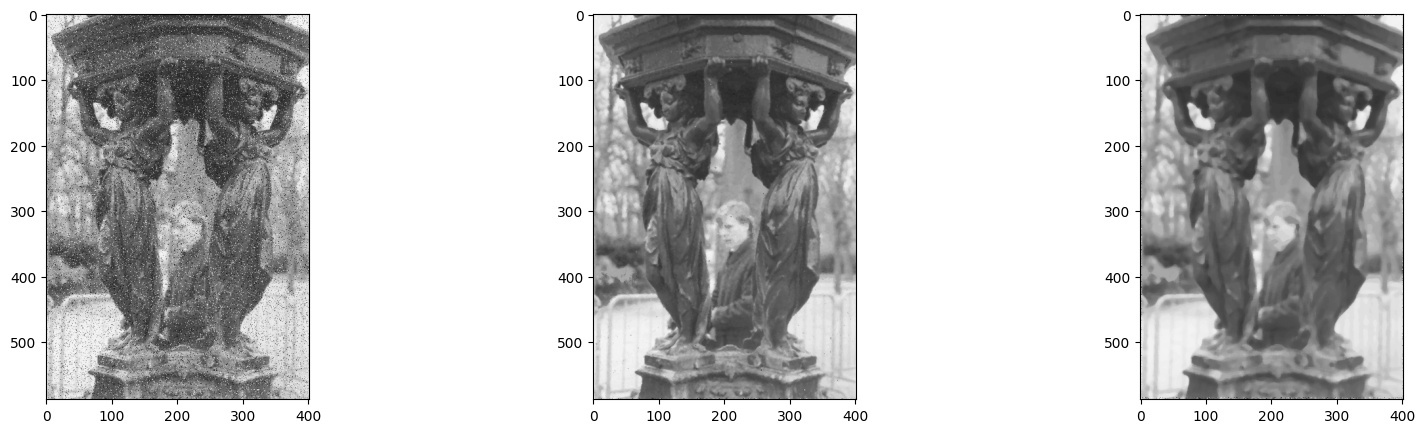

In [81]:
#  code here
#  code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

def mask_filter(dimension:int, img):
    anchor = int(np.ceil(dimension/2))
    new_img = img.copy() 
    dxy = int(dimension - anchor) # mediana do valor (mcc pura)
    rows = len(img)
    cols = len(img[0])
    for i in range(dxy,rows-dxy):
        for j in range(dxy,cols-dxy):
            neighbors = img[i-dxy:i+dxy+1, j-dxy:j+dxy+1]
            new_img[i,j] = np.median(neighbors)
    return new_img

img3 = cv2.imread("sta2noi1.png", cv2.IMREAD_GRAYSCALE)
img_filtered3 = mask_filter(3,img3)
img_filtered7 = mask_filter(7,img3)

plt.figure(figsize=(20, 5))    
plt.subplot(1,3,1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,3,2)
plt.imshow(img_filtered3, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,3,3)
plt.imshow(img_filtered7, cmap='gray', vmin=0, vmax=255);
plt.show()